In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random
import ipywidgets as widgets
from IPython.display import display, clear_output

In [2]:
root_folder = "art500k_period"

data = []

for folder in os.listdir(root_folder):
    folder_path = os.path.join(root_folder, folder)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            if file.endswith(".jpg"):
                file_path = os.path.join(folder_path, file)
                data.append((file_path, float(folder)))

df = pd.DataFrame(data, columns=["path", "period_label"])
df.head()

,path,period_label
0,art500k_period/1.0/823.jpg,1.0
1,art500k_period/1.0/16750.jpg,1.0
2,art500k_period/1.0/16988.jpg,1.0
3,art500k_period/1.0/The Ascension##dQE3OyMRBV0s...,1.0
4,art500k_period/1.0/32180.jpg,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235161 entries, 0 to 235160
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   path          235161 non-null  object 
 1   period_label  235161 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.6+ MB


In [4]:
df.isnull().sum()

path            0
period_label    0
dtype: int64

In [5]:
label_counts = df["period_label"].value_counts().sort_index()
label_counts

period_label
0.0        56
1.0      3066
2.0     16077
3.0      9939
4.0      6247
5.0    192637
6.0      7139
Name: count, dtype: int64

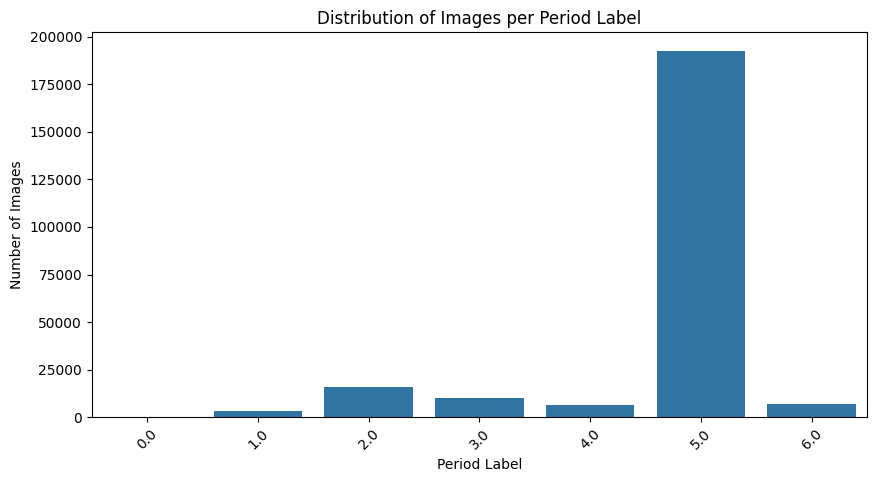

In [6]:
plt.figure(figsize=(10, 5))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xlabel("Period Label")
plt.ylabel("Number of Images")
plt.title("Distribution of Images per Period Label")
plt.xticks(rotation=45)
plt.show()

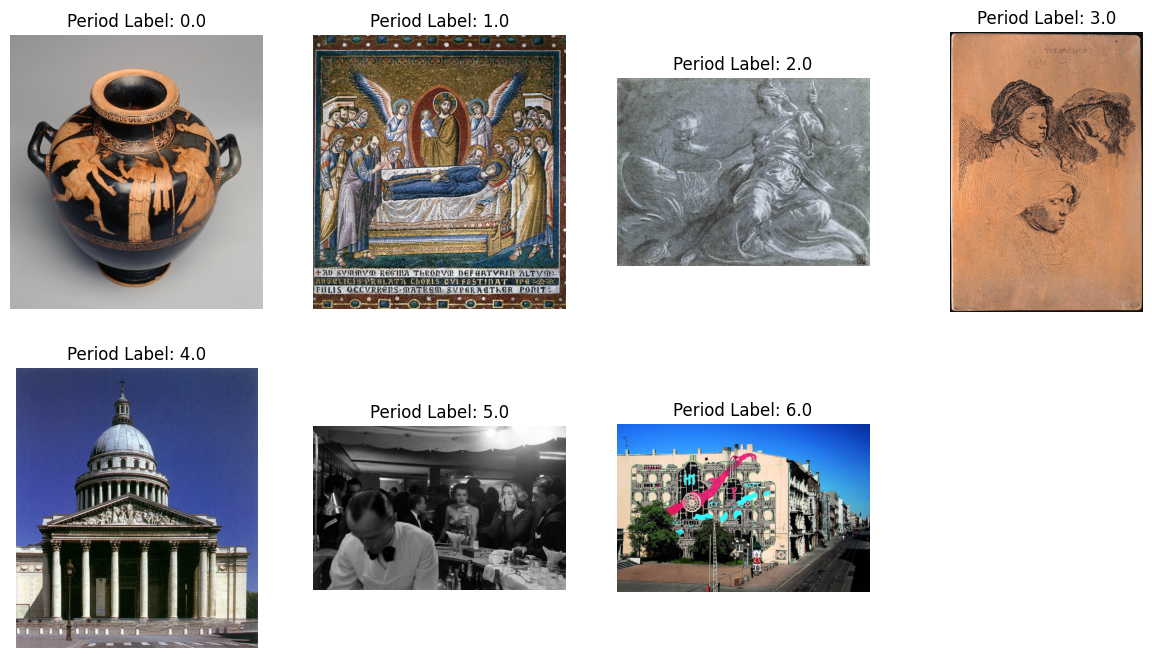

In [7]:
period_labels = sorted(df["period_label"].unique())

plt.figure(figsize=(15, 8))

for i, label in enumerate(period_labels):
    label_images = df[df["period_label"] == label]["path"].tolist()
    
    if not label_images:
        continue

    image_path = random.choice(label_images)

    image = Image.open(image_path)

    plt.subplot(2, 4, i + 1)
    plt.imshow(np.array(image).astype("uint8"))
    plt.axis("off")
    plt.title(f"Period Label: {label}")

plt.show()

In [8]:
image_samples = {label: random.sample(df[df["period_label"] == label]["path"].tolist(), 20) for label in period_labels}

In [9]:
def create_slider(period_label):
    output = widgets.Output()

    slider = widgets.IntSlider(min=0, max=19, step=1, value=0, description=f"Period {period_label}")

    def update(change):
        index = slider.value
        image_path = image_samples[period_label][index]
        image = Image.open(image_path)

        with output:
            clear_output(wait=True) 
            fig, ax = plt.subplots(figsize=(4, 4))
            ax.imshow(np.array(image).astype("uint8"))
            ax.axis("off")
            ax.set_title(f"Period {period_label}")
            plt.show()

    slider.observe(update, names="value")
    display(slider, output)
    update(None)

In [10]:
create_slider(0.0)

IntSlider(value=0, description='Period 0.0', max=19)

Output()

In [11]:
create_slider(1.0)

IntSlider(value=0, description='Period 1.0', max=19)

Output()

In [ ]:
create_slider(2.0)

IntSlider(value=0, description='Period 2.0', max=19)

Output()

In [13]:
create_slider(3.0)

IntSlider(value=0, description='Period 3.0', max=19)

Output()

In [14]:
create_slider(4.0)

IntSlider(value=0, description='Period 4.0', max=19)

Output()

In [ ]:
create_slider(5.0)

IntSlider(value=0, description='Period 5.0', max=19)

Output()

In [16]:
create_slider(6.0)

IntSlider(value=0, description='Period 6.0', max=19)

Output()